In [332]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

In [333]:
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hassa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Hassa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hassa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [334]:
df = pd.read_csv("C:/tt/Python/Elctro_Pi/Selection-Python/Project/One_product.csv")

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2814 entries, 0 to 2813
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2814 non-null   object 
 1   name                  2814 non-null   object 
 2   asins                 2814 non-null   object 
 3   brand                 2814 non-null   object 
 4   categories            2814 non-null   object 
 5   keys                  2814 non-null   object 
 6   manufacturer          2814 non-null   object 
 7   reviews.date          2814 non-null   object 
 8   reviews.dateAdded     2814 non-null   object 
 9   reviews.dateSeen      2814 non-null   object 
 10  reviews.didPurchase   0 non-null      float64
 11  reviews.doRecommend   2814 non-null   bool   
 12  reviews.id            0 non-null      float64
 13  reviews.numHelpful    2814 non-null   int64  
 14  reviews.rating        2814 non-null   int64  
 15  reviews.sourceURLs   

In [336]:
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0,5,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0,5,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0,5,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0,4,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0,5,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [337]:
df.isnull().sum()

id                         0
name                       0
asins                      0
brand                      0
categories                 0
keys                       0
manufacturer               0
reviews.date               0
reviews.dateAdded          0
reviews.dateSeen           0
reviews.didPurchase     2814
reviews.doRecommend        0
reviews.id              2814
reviews.numHelpful         0
reviews.rating             0
reviews.sourceURLs         0
reviews.text               0
reviews.title              0
reviews.userCity        2814
reviews.userProvince    2814
reviews.username           0
dtype: int64

In [338]:
columns_to_drop=['id','asins','brand','categories', 'keys', 'manufacturer', 'reviews.date','reviews.dateAdded','reviews.dateSeen','reviews.didPurchase','reviews.doRecommend', 'reviews.id', 'reviews.sourceURLs','reviews.userProvince', 'reviews.userCity', 'reviews.username']
df = df.drop(columns=columns_to_drop)

In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2814 entries, 0 to 2813
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   name                2814 non-null   object
 1   reviews.numHelpful  2814 non-null   int64 
 2   reviews.rating      2814 non-null   int64 
 3   reviews.text        2814 non-null   object
 4   reviews.title       2814 non-null   object
dtypes: int64(2), object(3)
memory usage: 110.1+ KB


In [340]:
df.isnull().sum()

name                  0
reviews.numHelpful    0
reviews.rating        0
reviews.text          0
reviews.title         0
dtype: int64

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2814 entries, 0 to 2813
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   name                2814 non-null   object
 1   reviews.numHelpful  2814 non-null   int64 
 2   reviews.rating      2814 non-null   int64 
 3   reviews.text        2814 non-null   object
 4   reviews.title       2814 non-null   object
dtypes: int64(2), object(3)
memory usage: 110.1+ KB


In [342]:
df['name'] = df['name'].astype(str)
df['reviews.numHelpful'] = df['reviews.numHelpful'].astype(float)
df['reviews.rating'] = df['reviews.rating'].astype(float)
df['reviews.text'] = df['reviews.text'].astype(str)
df['reviews.title'] = df['reviews.title'].astype(str)

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2814 entries, 0 to 2813
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                2814 non-null   object 
 1   reviews.numHelpful  2814 non-null   float64
 2   reviews.rating      2814 non-null   float64
 3   reviews.text        2814 non-null   object 
 4   reviews.title       2814 non-null   object 
dtypes: float64(2), object(3)
memory usage: 110.1+ KB


In [344]:
sid = SentimentIntensityAnalyzer()

In [345]:
def get_sentiment_label(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

In [346]:
def analyze_sentiment(text):
    scores = sid.polarity_scores(text)
    compound_score = scores['compound']
    return get_sentiment_label(compound_score)

In [347]:
df['sentiment'] = df['reviews.text'].apply(analyze_sentiment)

In [348]:
df.head()

,name,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",0.0,5.0,This product so far has not disappointed. My c...,Kindle,positive
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",0.0,5.0,great for beginner or experienced person. Boug...,very fast,positive
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",0.0,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,positive
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",0.0,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,positive
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",0.0,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,positive


In [349]:
# Mapping ratings to sentiment labels
df['true_sentiment'] = pd.cut(df['reviews.rating'], bins=[0, 1, 3, 5], labels=['negative', 'neutral', 'positive'])

In [350]:
true_labels = df['true_sentiment']
predicted_labels = df['sentiment']


In [351]:
cm = confusion_matrix(true_labels, predicted_labels)

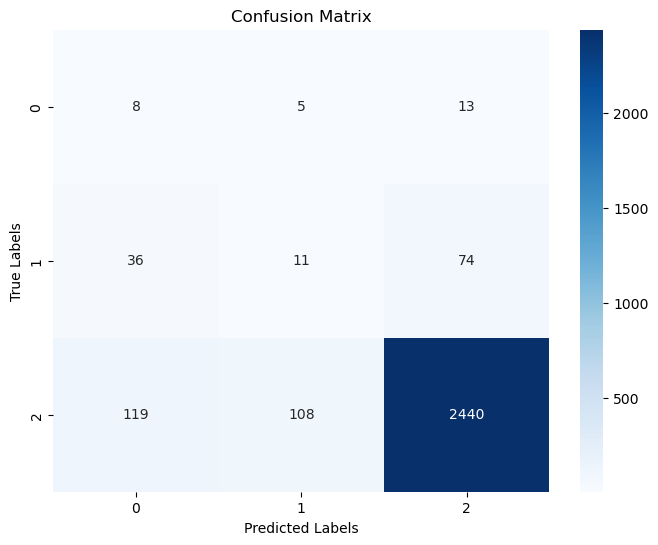

In [352]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [353]:
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

    negative       0.05      0.31      0.08        26
     neutral       0.09      0.09      0.09       121
    positive       0.97      0.91      0.94      2667

    accuracy                           0.87      2814
   macro avg       0.37      0.44      0.37      2814
weighted avg       0.92      0.87      0.90      2814



In [354]:

df.to_csv('output.csv', index=False)
